In [1]:
import pandas, numpy, matplotlib, seaborn
customers = pandas.read_csv('L06_Ecommerce_Customers.csv')

In [2]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


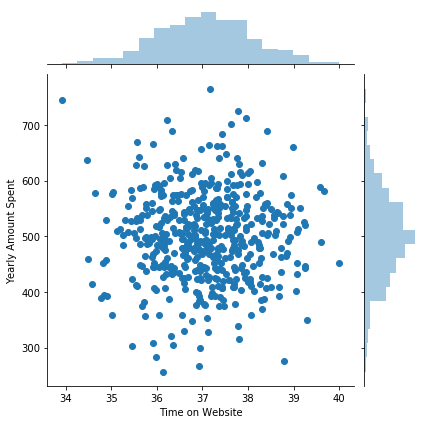

In [5]:
seaborn.jointplot(x="Time on Website", y="Yearly Amount Spent", data=customers)

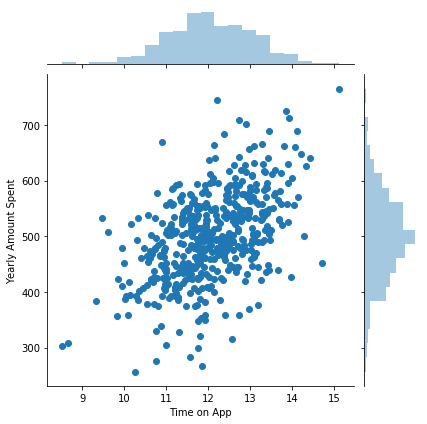

In [6]:
seaborn.jointplot(x="Time on App", y="Yearly Amount Spent", data=customers)

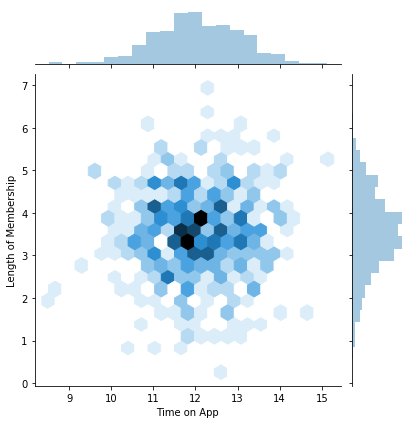

In [7]:
seaborn.jointplot(x="Time on App", y="Length of Membership", data=customers, kind='hex')

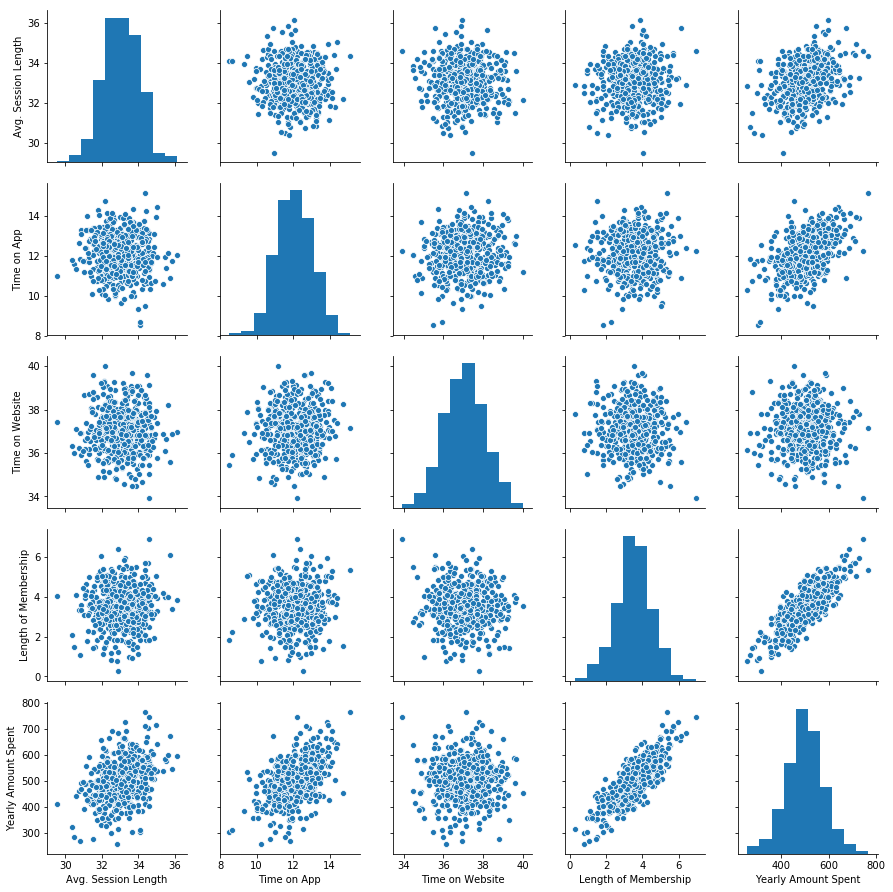

In [8]:
seaborn.pairplot(customers)

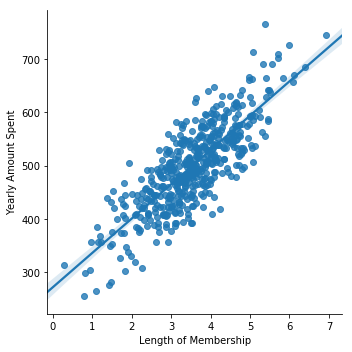

In [9]:
seaborn.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=customers)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

NUMERIC_COLUMNS = ['Avg. Session Length',	'Time on App', 
                   'Time on Website',	'Length of Membership']
Y_COL = 'Yearly Amount Spent'

x = customers[NUMERIC_COLUMNS]
y = customers[Y_COL]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=101)

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
print(f"Coefficients:\n {lm.coef_}")

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [12]:
y_predicted = lm.predict(x_test)

In [13]:
df = pandas.DataFrame({'Y Test': y_test, 'Predicted Y': y_predicted})

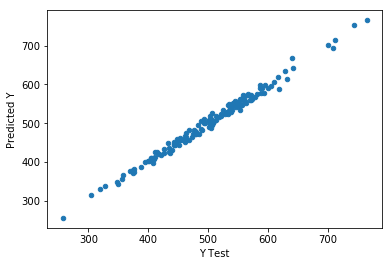

In [14]:
df.plot('Y Test', 'Predicted Y', 'scatter')

In [15]:
diff_f = lambda r: r['Y Test'] - r['Predicted Y']
diff = df.apply(diff_f, 'columns')

In [16]:
abs_diff = diff.map(abs)
mse = abs_diff.apply(numpy.square).sum() / abs_diff.count()
print('MAE:', abs_diff.sum() / abs_diff.count())
print('MSE:', mse)
print('RMSE:', numpy.sqrt(mse))

MAE: 7.22814865343086
MSE: 79.81305165097483
RMSE: 8.933815066978655


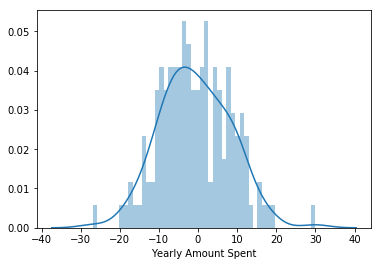

In [17]:
seaborn.distplot(diff, bins=50, axlabel=Y_COL)

In [18]:
pandas.DataFrame({'Coefficients': lm.coef_}, index=NUMERIC_COLUMNS)

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


### Do you think the company should focus more on their mobile app or on their website?

Mobile app
